# Chapter 9. Unsupervised Learning Techniques
* **Clustering:Group similar instances together into clusters.**
* **Anomaly detection: The objective is to learn what "normal" data looks like, and then use that to detect abnormal instaces**
* **Density estimation: Estimating the *probability density function(PDF)* of the random process that generated the dataset. Commonly used for anomaly detection**

## Clustering
* **The task of identifying similar instances and assigning them to *clusters*, or groups of similar instances**
* ***Customer analysis***
* ***Data Analysis***
    * **When you analyze a dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately**
* ***Dimensionality Reduction technique**
    * **Once a dataset has been clustered, it is usually possible to measure each instance's affinity with each cluster**
* ***Anomaly detection***
    * **Any instance that has a low affinity to all the clusters is likely to be an anomaly**
* ***Semi-supervised learning***
    * **If you only have a few labels, you could perform clustering and propagate the lables to all the instances in the same cluster**
* ***Search Engines***
* ***Segement an image***

### K-Means

In [12]:
import numpy as np

In [128]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [13]:
import matplotlib.pyplot as plt

In [4]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

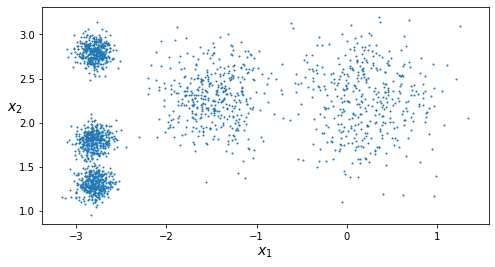

In [9]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

**Train a K-Means clusterer on this dataset. It will try to find the blob's center and assign each instance to the closet blob**

In [11]:
from sklearn.cluster import KMeans

In [11]:
k=5

In [12]:
kmeans=KMeans(n_clusters=k)

In [13]:
y_pred=kmeans.fit_predict(X)

* **You have to specify the number of clusters *k* that the algorithm must find**
* **In the context of clustering, an instance's *label* is the index ofn the cluster that this instance gets assigned to by the algorithm**
* **The** KMeans **instance preserves the lables of the instances it was trained on, availiable via the** labels_ **instance variable**

In [14]:
y_pred

array([4, 0, 1, ..., 3, 1, 0], dtype=int32)

In [15]:
y_pred is kmeans.labels_

True

**We can also take a look at tje five centrods that the algorithm found**

In [16]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20667809,  2.25769931],
       [-1.46893704,  2.28372774],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

**You can easily assign new instances to the cluster whose centroid is cloesest**

In [17]:
X_new=np.array([[0,2],[3,2],[-3,3],[-3,2.5]])

In [18]:
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

* **Hard clustering:**
    * **Assigning each instance into a single cluster**
* **Soft clusering:**
    * **It can be useful to give each instance a score per cluster. The socre can be the distance between the instance and the centroid. In the KMeans class,** transform( ) **measures the distacne from each instance to every entrod**
    * **If you have a high-dimensionality dataset and you transform it this wat, you end up with a k-dimensional dataset.**
    * **This transformation can be very efficient nonlinear dimensionality reduction technique.**

In [19]:
kmeans.transform(X_new)

array([[2.81093633, 0.33034038, 1.49608739, 2.9042344 , 2.88633901],
       [5.80730058, 2.80518382, 4.47793476, 5.84739223, 5.84236351],
       [1.21475352, 3.29147303, 1.69032533, 0.29040966, 1.71086031],
       [0.72581411, 3.21581933, 1.54626242, 0.36159148, 1.21567622]])

### The K-Means algorithm
* **You could easily label all the instances in the dataset by assigning each of them to the cluster whose centroid is closest**
* **If you were given all the instance lables, you could easily locate all the centroids by computing the mean of the instances for each cluster**
* **If neither the labels nor the centroids was given, then start by placing the centroids randomly, label the instances, update the centroids, until the centrod stop moving**
* **The computational complexity of the algorithm is generally linear with regard to the number of instances *m*, the number of clusters *k*, and the number of dimensions *n***
* **Although the algorithm is guaranteed to converge, it may not converge to the right solution(may converge to a local optimum)**

### Centroid Initialization methods
* **If you happen to know approximately where the centroids should be, then you can set the** init **hyperparameter to a NumPy array containing the list of centrods, and set** n_init **to 1**

In [20]:
good_init=np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])

In [21]:
kmeans=KMeans(n_clusters=5,init=good_init,n_init=1)

* **Another solution us to run the algorithm multiple times with different random initialization and keep the best solution**
* **The number of random initializations is controlled by the** n_init **hyperparameter: by default, it is equal to 10, which means the whole algorithm rund 10 times when you call the** fit( ) **method, and SK-Learn finds the best solution**
* **Inertia:The mean squared distance between each instance and its closest centroid**
* **The** KMeans **class runs the algorithm** n_init **times and keeps the model with the lowest inertia**
* **The** KMeans **class uses *K-Means++* by default. If you want to force it to use the original method, you can set the** init **hyperparameter to** "random"

**Model's** inertia **is accessible via the** inertia_ **insrance variable**

In [26]:
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [27]:
kmeans.inertia_

211.62337889822362

**The** score( ) **method returns the negative inertia**
* **The predictor's** score( ) **method will always respect SK-Learn's "greater is better" rule: if a predictor is bettter than another, its** score( ) **method should return a greater score**

In [28]:
kmeans.score(X)

-211.62337889822362

### Accelerated K-Means and mini-batch K-Means
* **Accelerated K-Means:**
    * **Accelerates the algorithm by avoiding many unecessary distance calculation.**
    * **This is the algorithm the** KMeans **class uses by default(you can force it to use the original algorithm by setting the algorithm hyperparameter to** "full")
* **Mini-batch K-Means:**
    * **Instead of using the full dataset at each iteration, the algortithm is capable of using mini-batches, moving the centroids just slightly at each iteration.**
    * **Speeds up the algorithm by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory**
    * **Although the Mini-batch K-Menas algorithm is much faster than the regular K-Means algorithm, its inertia is generally slightly worse, especially as the number of clusters increases**

In [29]:
from sklearn.cluster import MiniBatchKMeans

In [30]:
minibatch_kmeans=MiniBatchKMeans(n_clusters=5)

In [31]:
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

### Finding the optimal number of clusters
* **Inertia is not a good performance metric when trying to choose *K* because it keeps getting lower as we increase *K***
* ***Silhoutte Score***
    * **An instance's silhouette coefficient is equal to (b-a)/max(a,b).**
    * ***a* is the mean distance to the other instances in the same cluster(i.e., the mean intra-cluster distance).**
     * ***b* is the mean nearest-cluster distance(i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes *b*, excluding the instance's own cluster)**
     * **The silhouette coefficient can vary between -1 and +1. A coefficient close to +1 means that the instance is well inside its own clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finaly a coefficient close to -1 means that the instance may have been assigned to the wrong cluster**    

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
silhouette_score(X,kmeans.labels_)

0.655517642572828

In [35]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

In [36]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

**Compare the silhouette scores for different number of clusters**

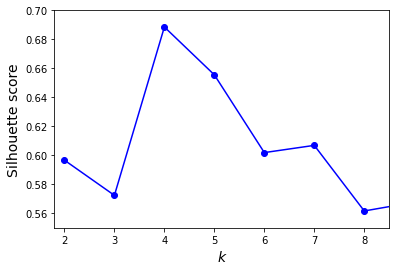

In [39]:
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

***Silhouette diagram:* Plot every' instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient**
* **The shape's height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster.The dashed line indicates the mean silhouette coefficient**

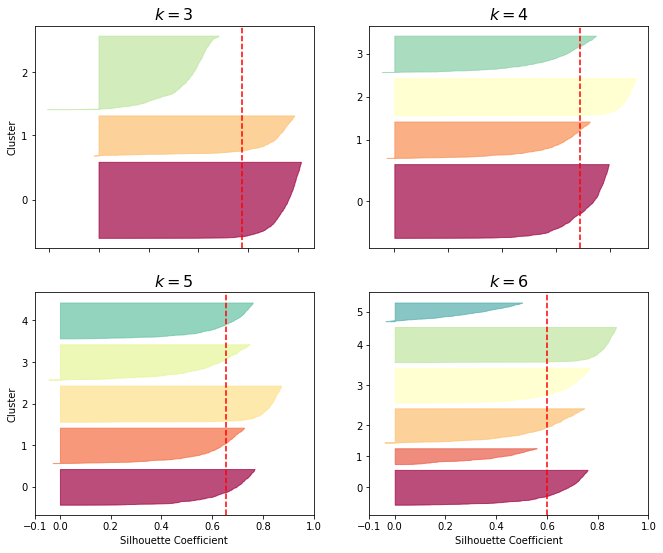

In [41]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

### Limits of K-Means
* **It is necessary to run the algorithm several times to avoid suboptimal solutions,plus you need to specify the number of clusters, which can be quite a hassle**
* **K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes**
* **It is important to scale the inpurt features before you run K-MEnas, or the clusters may be very stretched and K-Means will perform poorly**

### Using Clustering for Image Segmentation
* ***Image segmentation:* The task of partitioning an image into multiple segments.**
* ***semantic segementation:* all pixels that are part of the same object type et assigned to the same segment**
* ***instance segementation:*  all pixels taht are part of the same individual object are assigned to the same segment**

In [44]:
from matplotlib.image import imread
import os

In [65]:
image=imread(os.path.join("images","unsupervised_learning","ladybug.png"))

**The image is represented as a 3D array**
* **The first dimension's size is the height; the second is the width; and the third is the number of color channels, the this case red, gree, and blue(RGB)**
* **For each pixel there is a 3D vector containing the intensities of red,green, and blue, each between 0.9 and 1.0(or between 0 and 255, if you use imageio.imread( ))**

**Reshape the array to get a long list of RGB colors, then it clusters these colors using K-Means**

In [67]:
image.shape

(533, 800, 3)

In [68]:
X=image.reshape(-1,3)

In [69]:
kmeans=KMeans(n_clusters=8).fit(X)

In [70]:
segmented_img=kmeans.cluster_centers_[kmeans.labels_]

In [71]:
segmented_img=segmented_img.reshape(image.shape)

In [72]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

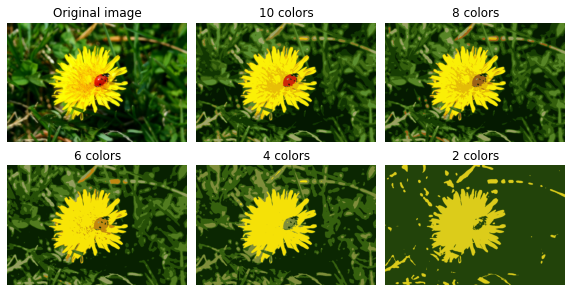

In [73]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### Using Clustering for Preprocessing

**Load th digits dataset**

In [1]:
from sklearn.datasets import load_digits

In [2]:
X_digits,y_digits=load_digits(return_X_y=True)

**Split the data into a training and a test set**

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X_digits, y_digits)

**Fit a logistic regression model**

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
log_reg=LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000)

In [7]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='ovr')

In [8]:
log_reg.score(X_test,y_test)

0.9466666666666667

**Create a pipeline that will first cluster the training set into 50 clusters and replace the images with their their distances to these 50 clusters, then apply a Logistic Regression model**

In [9]:
from sklearn.pipeline import Pipeline

In [14]:
pipeline=Pipeline([
    ("kmeans",KMeans(n_clusters=50)),
    ("log_reg",LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])

In [15]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [16]:
pipeline.score(X_test,y_test)

0.9755555555555555

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = dict(kmeans__n_clusters=range(2, 10))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.7s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 10)}, verbose=2)

In [19]:
grid_clf.best_params_

{'kmeans__n_clusters': 9}

In [20]:
grid_clf.score(X_test,y_test)

0.8911111111111111

### Using Clustering for Semi-Supervised Learning

**Train a Logistic Regression model on a sample of 50 labeled instances from the digits dataset**

In [21]:
n_labeled=50
log_reg=LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

LogisticRegression(multi_class='ovr', random_state=42)

In [22]:
log_reg.score(X_test,y_test)

0.7688888888888888

**Cluster the training set into 50 clusters. Then for each cluster, find the image cloases to the centroid. These images become *representative images***

In [23]:
k=50

In [24]:
kmeans=KMeans(n_clusters=k)

In [25]:
X_digits_dist=kmeans.fit_transform(X_train)

In [26]:
representative_digit_idx=np.argmin(X_digits_dist,axis=0)

In [27]:
X_representative_digits=X_train[representative_digit_idx]

**Look at these images and label them manually**

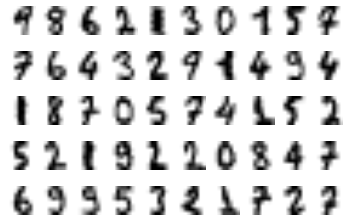

In [28]:
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [29]:
y_representative_digits=np.array([9,8,6,2,1,3,0,7,5,7,
                                 7,6,4,3,2,9,1,4,9,4,
                                 1,8,7,0,5,7,4,1,5,2,
                                 5,2,1,9,2,2,0,8,4,7,
                                 6,9,9,5,3,2,1,7,2,7])

**The dataset with just 50 labeled instances, buit instead of being random instances, each of them is representative image of its cluster**

In [30]:
log_reg=LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)

In [31]:
log_reg.fit(X_representative_digits,y_representative_digits)

LogisticRegression(multi_class='ovr', random_state=42)

In [32]:
log_reg.score(X_test,y_test)

0.88

***Label propagation:***
* **What if we propagated the labels to all the other instances in the same cluser**

In [35]:
y_train_propagated=np.empty(len(X_train),dtype=np.int32)

In [36]:
for i in range(k):
    y_train_propagated[kmeans.labels_==i]=y_representative_digits[i]

In [37]:
log_reg=LogisticRegression()

In [38]:
log_reg.fit(X_train,y_train_propagated)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
log_reg.score(X_test, y_test)

0.8644444444444445

**The boost in accuracy is modest**
* **We propagated each instance's label to all the instances in the same cluster, including the instances located close to the cluster boundaries, which are more likely to be mislabeled**
* **Only propagate the labels to the 20% of the instances that are closest to the centroids**

In [40]:
percentile_closest=20

In [41]:
X_cluster_dist=X_digits_dist[np.arange(len(X_train)),kmeans.labels_]

In [43]:
for i in range(k):
    in_cluster=(kmeans.labels_==i)
    cluster_dist=X_cluster_dist[in_cluster]
    cutoff_distance=np.percentile(cluster_dist,percentile_closest)
    above_cutoff=(X_cluster_dist>cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff]=-1

In [46]:
partially_propagated=(X_cluster_dist!=-1)
X_train_partially_propagated=X_train[partially_propagated]
y_train_partially_propagated=y_train_propagated[partially_propagated]

**Train the model again on the partially propagated dataset**

In [47]:
log_reg=LogisticRegression()

In [48]:
log_reg.fit(X_train_partially_propagated,y_train_partially_propagated)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
log_reg.score(X_test,y_test)

0.8755555555555555

In [50]:
np.mean(y_train_partially_propagated==y_train[partially_propagated])

0.9721254355400697

### Active Learning
* **Active learning: When a human expert interacts with the learning algorithm, providing lables for specific instances when the algorithm requests them**
* ***Uncertainty sampling:***
1. **The model is trained on the labeled instance gathered so far, and this model is used to make predictions on the unlabeled instances**
1. **The instances for which the model is most uncertain are give to the expert to be labeled**
1. **You iterate this process until the performance improvement stops being worth the labeling effort**

### DBSCAN
1. **For each instance, the algorithm counts how many instances are located within a small distance espislon from it, the region is called the instance's e-neighborhood**
1. **If an instance has at least** min_samples **instances in its e-neighborhood(including itself), then it is considered a *core instance*.In other words, core instances are those that are located in dense regions**
1. **All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefor, a long sequence of neighboring core instances forms a single cluster**
1. **An instance that is not core instance and does not have one in its neighborhood is considered anomaly**

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [52]:
X,y=make_moons(n_samples=1000,noise=0.05)

In [55]:
dbscan=DBSCAN(eps=0.05,min_samples=5)

In [56]:
dbscan.fit(X)

DBSCAN(eps=0.05)

**labels of all of the instances are availiable now in the** labels_ **instance variable**

In [58]:
dbscan.labels_[:100]

array([ 0, -1, -1,  4,  5,  0,  1,  2,  2,  2,  0,  3,  1,  3,  0,  6,  4,
        5,  5, -1,  3,  0,  2, -1,  5,  0, -1,  2,  2,  6,  3,  3,  1,  3,
        5,  3,  5,  5,  7,  5,  0,  2,  5,  7,  3,  4,  2,  3,  2,  2,  3,
        2,  6,  0,  6,  3,  2,  6,  0,  6,  3,  0,  3,  2,  3, -1,  1,  4,
        0,  0,  6,  6,  1,  3, -1,  2,  0,  5,  4,  3,  3,  6,  2, -1,  5,
        2,  3,  2,  2,  0,  0,  3,  6, -1,  7,  2,  2,  2, -1,  2])

1. **When some instance have a cluster index equal to -1, which means that they are considered anomalies by the algorithm**
1. **The indices of the core instances are availiable in the** core_sample_indices_ **instance variable**
1. **The core instance themselves are availiable in the** components_ **instance variable**

In [60]:
len(dbscan.core_sample_indices_)

792

In [62]:
dbscan.core_sample_indices_[:100]

array([  0,   5,   6,   7,   8,   9,  10,  11,  12,  13,  16,  17,  18,
        20,  21,  22,  24,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  39,  40,  41,  42,  43,  44,  46,  47,  49,  50,  51,
        53,  54,  55,  56,  57,  58,  59,  62,  63,  64,  66,  68,  69,
        70,  71,  72,  73,  75,  76,  77,  78,  80,  81,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  94,  95,  96,  97,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 111, 112, 113, 114, 116, 118,
       119, 121, 122, 125, 126, 127, 129, 132, 134])

In [63]:
dbscan.components_

array([[ 1.98167467,  0.24655861],
       [ 1.72981762, -0.10872786],
       [ 0.06050209,  0.1226356 ],
       ...,
       [ 1.44364583, -0.44334775],
       [ 0.79985284, -0.45132414],
       [-0.09576838,  1.02598952]])

**Train a** KNeighborsClassifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier(n_neighbors=50)

In [66]:
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

**Given a few new instances, we can predict which cluster they most likely belong to and even estimates the probability for each cluster**

In [67]:
X_new=np.array([[-0.5,0],[0,0.5],[1,-0.1],[1,-0.1],[2,1]])

In [68]:
knn.predict(X_new)

array([6, 1, 3, 3, 0])

In [69]:
knn.predict_proba(X_new)

array([[0.  , 0.12, 0.04, 0.  , 0.  , 0.  , 0.84, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.54, 0.28, 0.18, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.54, 0.28, 0.18, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

**It is straightforward to introduce a maximum distance, in which case the two instances are far away from both clusters are classified as anomalies**
* **Use the** kneighbors( ) **method of the** KNeighborsClassifier
* **Given a set of instances, it returns the distances and the indices of the *k* nearest neighbors in the training set**

In [77]:
y_dist,y_pred_idx=knn.kneighbors(X_new,n_neighbors=1)

In [78]:
y_pred=dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

In [79]:
y_pred[y_dist>0.2]=-1

In [80]:
y_pred.ravel()

array([-1,  1,  4,  4, -1])

**DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of any shape. It is robust to outliers, and has just two hyperparameters(eps and min_samples). If the density varies significantly across the clusters, however, if can be impossible for it to capture all the clusters properly**

## Other Clustering Algorithms
* **Agglomerative clustering**
    * **A hierarchy of clusters built from the bottom up**
    * **At each iteration, agglomerative clustering connects the nearest pair of cluster. If you drew a tree with a brancn for every pair of clusters that merged, you would get a binary tree of clusters, where the leaves are the individual instances**
    * **It can capture clusters of various shapes, it produces a flexible and informative cluster tree instead of forcing you to choose a particular cluster scale, and it can be used with any pairwise distance**
* **BIRCH**
    * **The algorithm was designed specifically for very large datasets, and it can be faster than batch K-Means.**
* **Mean-Shift**
    * **Starts by placing a circle centered on each instacne; then for each circle it computes the mean of all the instances located within it,and it shifts the circle so that it is centered on the mean**
    * **It iterates this mean-shifting step until all the circles stop moving**
    * **Mean-Shifts shifts the circles in the direction of higher-density, until each of them had found a local density maximum**
    * **All the instances whose circles have settled in the same place are assigned to the same cluster**
* **Affinity propoagation**
    * **This algorithm uses a voting system, where instances vote for similar instances to be their representatives, and once the algorithm converges, each representatives and its voters form a cluster.**
* **Spectral clustering**
    * **This algorithm takes a similarity matrix betweem instances and creates a low-dimensional embedding from it, then it uses another clustering algorithm in this low-dimensional space**
    * **Spectral clustering can capture complex clusters structrues, and it can also be used to cut graphs**

In [81]:
%%bash
git status

On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store
	.ipynb_checkpoints/
	Chapter  4 Training Model.docx
	Chapter 5 Support Vector Machines.docx
	Chapter 6 Decision Trees.docx
	Chapter 7 Ensemble Learning and Random Forest.docx
	Chapter 8 Dimensionality Reduction.docx
	NCDB_2014.csv
	bc.ipynb
	bc1.csv
	ch9_unsupervised_learning.ipynb
	images/
	iris

nothing added to commit but untracked files present (use "git add" to track)


In [82]:
%%bash 
git add "ch9_unsupervised_learning.ipynb"

In [ ]:
%%bash
git commit